In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [2]:
cropdf = pd.read_csv("./data/Crop_recommendation.csv")
city_temp_rain = pd.read_csv("./data/city_temp.csv")
city_temp_rain.head()

,City,Season,Temperature,Rainfall,Humidity
0,Mumbai,Summer,29.441725,186.000,77.70
1,Mumbai,Winter,25.180149,2.650,64.68
2,Mumbai,Rainy,27.855574,534.467,86.80
3,Mumbai,Spring,26.770742,0.700,65.60
4,Mumbai,Pre Winter,28.540164,44.700,70.65


In [3]:
cropdf.shape
cropdf.columns
cropdf.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
del cropdf['N']
del cropdf['P']
del cropdf['K']
del cropdf['ph']

In [5]:
cropdf.isnull().any()

temperature    False
humidity       False
rainfall       False
label          False
dtype: bool

In [6]:
print("Number of various crops: ", len(cropdf['label'].unique()))
print("List of crops: ", cropdf['label'].unique())

Number of various crops:  22
List of crops:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [7]:
cropdf['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [8]:
crop_summary = pd.pivot_table(cropdf,index=['label'],aggfunc='mean')
crop_summary.head()

,humidity,rainfall,temperature
label,,,
apple,92.333383,112.654779,22.630942
banana,80.358123,104.626980,27.376798
blackgram,65.118426,67.884151,29.973340
chickpea,16.860439,80.058977,18.872847
coconut,94.844272,175.686646,27.409892


C:\Users\adity\AppData\Local\Temp\ipykernel_11960\4202651295.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cropdf.corr(), annot=True,cmap='Wistia' )


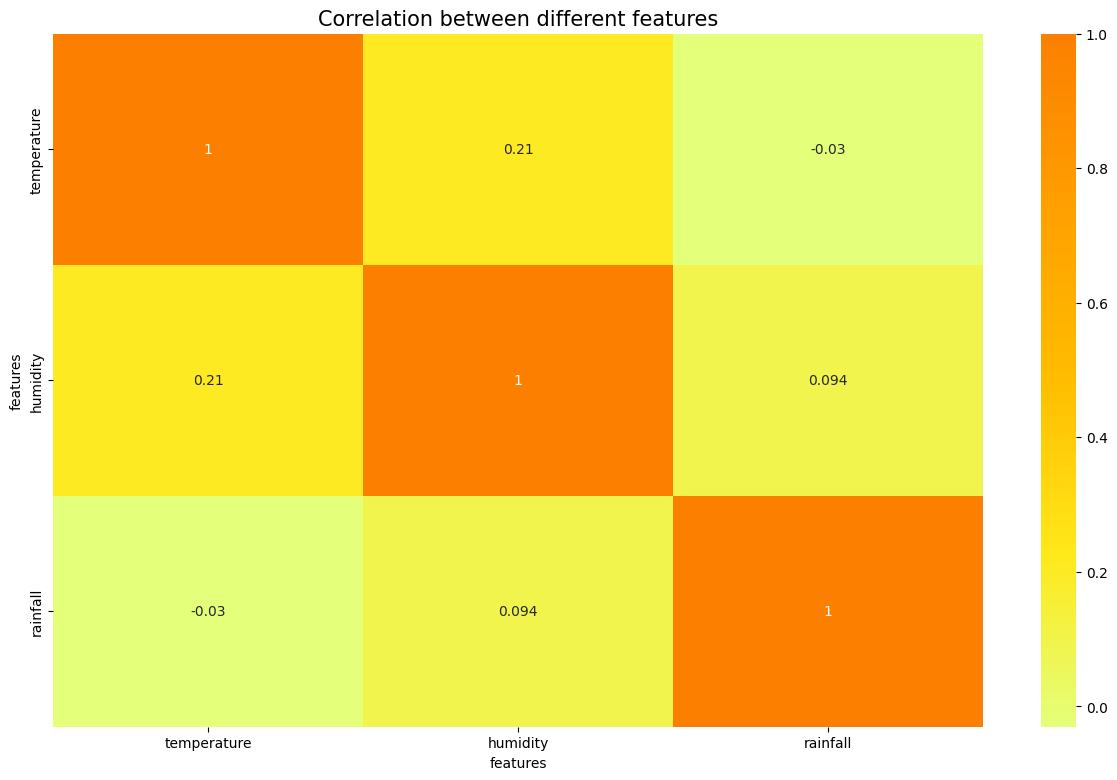

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(cropdf.corr(), annot=True,cmap='Wistia' )
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [10]:
X = cropdf.drop('label', axis=1)
y = cropdf['label']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    shuffle = True, random_state = 0)

In [12]:
# build the lightgbm model
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [13]:
# predict the results
y_pred=model.predict(X_test)

In [14]:
# view accuracy
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


LightGBM Model accuracy score: 0.9030


In [15]:
y_pred_train = model.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9994


In [16]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9994
Test set score: 0.9030


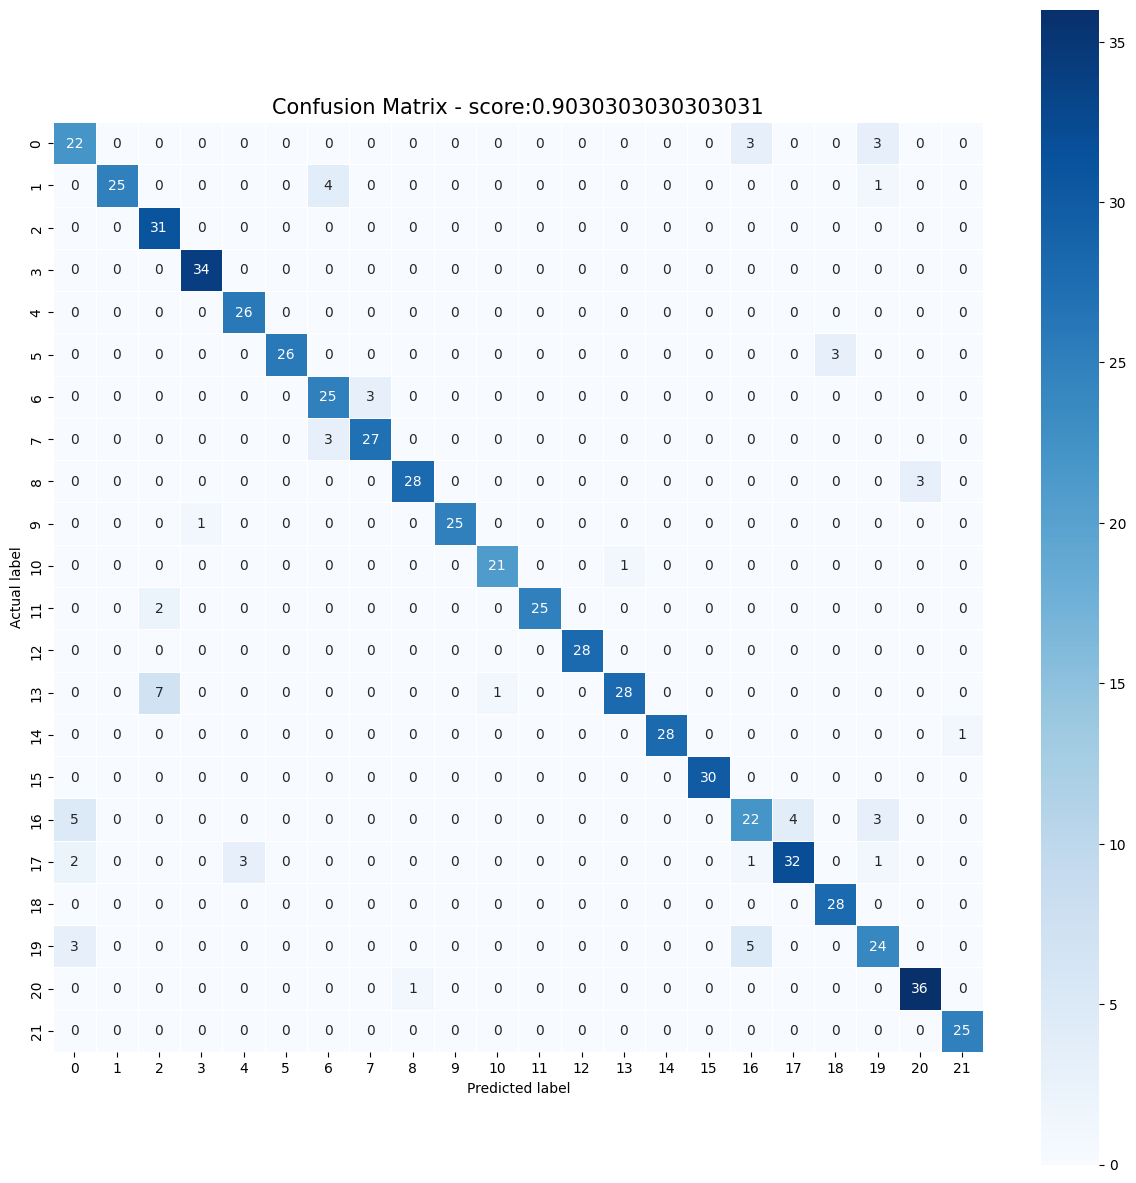

In [17]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       0.69      0.79      0.73        28
      banana       1.00      0.83      0.91        30
   blackgram       0.78      1.00      0.87        31
    chickpea       0.97      1.00      0.99        34
     coconut       0.90      1.00      0.95        26
      coffee       1.00      0.90      0.95        29
      cotton       0.78      0.89      0.83        28
      grapes       0.90      0.90      0.90        30
        jute       0.97      0.90      0.93        31
 kidneybeans       1.00      0.96      0.98        26
      lentil       0.95      0.95      0.95        22
       maize       1.00      0.93      0.96        27
       mango       1.00      1.00      1.00        28
   mothbeans       0.97      0.78      0.86        36
    mungbean       1.00      0.97      0.98        29
   muskmelon       1.00      1.00      1.00        30
      orange       0.71      0.65      0.68        34
      papaya       0.89    

In [19]:
newdata=model.predict([[20.879744, 82.00274423, 202.9355362]])
print(newdata)

['rice']


In [ ]:
from tkinter import *
windows =Tk()
windows.title("Soil predictor")
windows.geometry('500x300')


label1=Label(windows,text='Select City:',fg='blue',font=('Arial',14))
label1.grid(row=0,column=0,padx=5,pady=10)

# label for rain
label1=Label(windows,text='Select season :',fg='blue',font=('Arial',14))
label1.grid(row=1,column=0,padx=5,pady=10)

city=StringVar()
season=StringVar()

drop=OptionMenu(windows,city,"Mumbai","Delhi","Bangalore","Chennai","Lucknow","Rajasthan","Bhubhneshwar","Rourkela")
drop.grid(row=0,column=1)
# Entry for season
drop=OptionMenu(windows,season,"Summer","Winter","Rainy","Spring","Pre Winter")
drop.grid(row=1,column=1)

def result():

    for row in city_temp_rain.iterrows():
        if row[1]['City']==city.get() and row[1]['Season']==season.get():
            temperature = row[1]['Temperature']
            rainfall = row[1]['Rainfall']
            humidity = row[1]['Humidity']
    prediction = model.predict([[temperature, humidity, rainfall]])
    emptylabel.config(text='Crop :'+prediction[0])
 



button1=Button(windows,text='find',command=result,fg='green',font=('Arial',14))
button1.grid(row=6,column=1,sticky=W)
#  area to print 
emptylabel=Label(windows,fg='green',font=('Times',16,'bold italic'))
emptylabel.grid(row=8,column=1,sticky=W,pady=15)

windows.mainloop()